In [16]:
import random
import csv
import axelrod as axl
%matplotlib inline

# For Q1

In [10]:
random.seed(1)
for i in range(1, 21):
    with open("N_{}.csv".format(i), 'w') as csvfile:
        writer = csv.writer(csvfile)
        for i in range(200):
            writer.writerow([random.randint(1, 100)])

# For Q4

In [50]:
players = [s() for s in axl.basic_strategies]
players.append(axl.Random())
players.append(axl.ALLCorALLD())
players

[Alternator,
 Anti Tit For Tat,
 Bully,
 Cooperator,
 Defector,
 Suspicious Tit For Tat,
 Tit For Tat,
 Win-Stay Lose-Shift,
 Random: 0.5,
 ALLCorALLD]

In [60]:
random.seed(1)
tournament = axl.Tournament(players, turns=10, repetitions=5)
results = tournament.play()

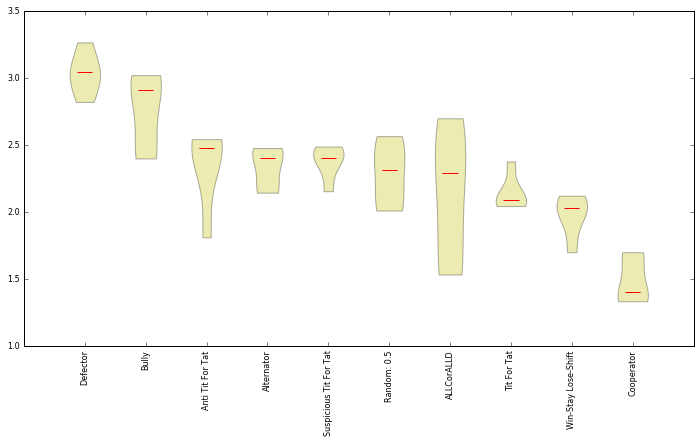

In [61]:
plot = axl.Plot(results)
plot.boxplot();

In [62]:
data_for_csv = list(tournament._data_for_csv())

In [68]:
data = [["Player 1 Name", "Player 2 Name", "P1 Score Rep 1", "P2 Score Rep 1", "P1 Score Rep 2", "P2 Score Rep 2",
        "P1 Score Rep 3", "P2 Score Rep 3", "P1 Score Rep 4", "P2 Score Rep 4", "P1 Score Rep 5", "P2 Score Rep 5"]]
for row in data_for_csv:
    data.append([row[2], row[3]])
    for string in row[4:]:
        interaction = axl.interaction_utils.string_to_interactions(string)
        final_scores = axl.interaction_utils.compute_final_score(interaction)
        for score in final_scores:
            data[-1].append(score)

In [70]:
with open("tournament.csv", "w") as csvfile:
    writer = csv.writer(csvfile)
    for row in data:
        writer.writerow(row)